In [1]:
import pandas as pd
import numpy as np
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
sns.set_theme(style="dark")

## 1) Load the tips dataset from either pydataset or seaborn.

In [2]:
df = data('tips')

In [3]:
df.shape

(244, 7)

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


## 2) Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [5]:
# Create my variables
X = df[['total_bill']]
y = df['tip']

#create a thing
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

#add results and baseline to df  
df['yhat_baseline'] = y.mean()
df['yhat']= predictions


df.head(10)

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822
6,25.29,4.71,Male,No,Sun,Dinner,4,2.998279,3.576340
7,8.77,2.00,Male,No,Sun,Dinner,2,2.998279,1.841335
8,26.88,3.12,Male,No,Sun,Dinner,4,2.998279,3.743329
9,15.04,1.96,Male,No,Sun,Dinner,2,2.998279,2.499838
10,14.78,3.23,Male,No,Sun,Dinner,2,2.998279,2.472532


## 3) Plot the residuals for the linear regression model that you made.

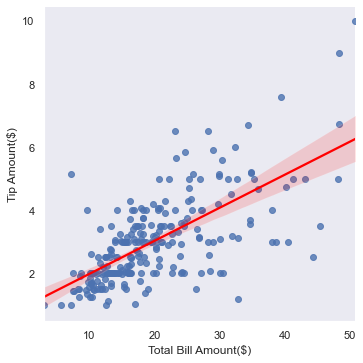

In [62]:
ax = sns.lmplot(y="tip", x="total_bill", data=df, line_kws={'color': 'red'})
ax.set( ylabel = "Tip Amount($)", xlabel = "Total Bill Amount($)")

plt.show()

[Text(0, 0.5, 'residual'), Text(0.5, 0, 'total bill($)')]

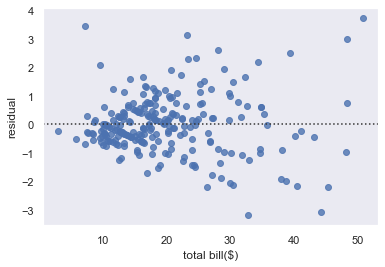

In [67]:
ax1 = sns.residplot(x = "total_bill",
              y = "tip",
              data = df)
ax1.set( ylabel = "residual", xlabel = "total bill($)")

## 4)  Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

## 5)Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [8]:
from sklearn.metrics import mean_squared_error

In [13]:
# calculate MSE2
MSE2 = mean_squared_error(y, df.yhat)
MSE2_baseline = mean_squared_error(y, df.yhat_baseline)

print(f"MSE ${round(MSE2, 2)}") 
print(f"MSE baseline ${round(MSE2_baseline, 2)}")
print()


#calculate SSE

SSE = MSE2 * len(df)
TSS = MSE2_baseline * len(df)

print("SSE", round(SSE, 2)) 
print("TSS" , round(TSS, 2))
print()

#calculate RMSE: either take square root of MSE or use sklearn (kwarg 'squared = False')

RMSE2 = mean_squared_error(y, df.yhat, squared = False)
RMSE2_baseline = mean_squared_error(y, df.yhat_baseline, squared=False)

print(f"RMSE ${round(RMSE2, 2)}") 
print(f"RMSE baseline ${round(RMSE2_baseline, 2)}")
print()

ESS = TSS - SSE
print(f"ESS {round(ESS, 2)}")
print()

# calculate R2 the easy way:

from sklearn.metrics import r2_score
print(f"R2 Score {r2_score(y, df.yhat)}")


MSE $1.04
MSE baseline $1.91

SSE 252.79
TSS 465.21

RMSE $1.02
RMSE baseline $1.38

ESS 212.42

R2 Score 0.45661658635167657


# 6) Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [15]:
def SSE_compare(SSE, TSS):
    if SSE < TSS:
        return print('Our model performs better than the baseline')
        
    else:
        print('Our model is not better than the baseline')

In [16]:
SSE_compare(SSE, TSS)

Our model performs better than the baseline


## 7) What is the amount of variance explained in your model?

In [17]:
print(f"The variance explained by our model is {round(r2_score(y, df.yhat),3)}")

The variance explained by our model is 0.457


## 8) Is your model better than the baseline model?


Yes

## 9) 

In [48]:
import sklearn.metrics
from math import sqrt
residuals = df.yhat - df.tip
residuals_squared = sum(residuals**2)
SSE = residuals_squared

ESS = sum((df.yhat - df.tip.mean())**2)

TSS = ESS + SSE

MSE = mean_squared_error(df.tip,df.yhat)

RMSE = mean_squared_error(df.tip, df.yhat, squared = False)

d =  {'SSE': [round(SSE,2)],
      'ESS': [round(ESS,2)],
      'TSS': [round(TSS,2)],
      'MSE': [round(MSE,2)],
      'RMSE': [round(RMSE,2)]}
errors_df=pd.DataFrame(d,index=['Model Reggression Errors'])
errors_df.T

,Model Reggression Errors
SSE,252.79
ESS,212.42
TSS,465.21
MSE,1.04
RMSE,1.02


In [51]:
def regression_errors(y, yhat):
    residuals = yhat - y
    residuals_squared = sum(residuals**2)
    SSE = residuals_squared
    
    
    ESS = sum((yhat - y.mean())**2)
    
    
    TSS = ESS + SSE
    
    
    MSE = sklearn.metrics.mean_squared_error(y,yhat)
    
    
    RMSE = sqrt(sklearn.metrics.mean_squared_error(y,yhat))
    
    d =  {'SSE': [round(SSE,2)],
      'ESS': [round(ESS,2)],
      'TSS': [round(TSS,2)],
      'MSE': [round(MSE,2)],
      'RMSE': [round(RMSE,2)]}
    errors_df=pd.DataFrame(d,index=['Model Reggression Errors'])
    return errors_df.T
    

In [52]:
regression_errors(y, df.yhat)

,Model Reggression Errors
SSE,252.79
ESS,212.42
TSS,465.21
MSE,1.04
RMSE,1.02


In [53]:
def baseline_mean_errors(y):
    baseline = y.mean()
    residuals = baseline - y
    residuals_squared = sum(residuals**2)
    
    SSE = residuals_squared
    
    MSE = SSE/len(y)
    
    RMSE = sqrt(MSE)
    
    d =  {'SSE': [round(SSE,2)],
      'MSE': [round(MSE,2)],
      'RMSE': [round(RMSE,2)]}
    
    baseline_errors_df=pd.DataFrame(d,index=['Baseline Reggression Errors'])
    return baseline_errors_df.T

In [54]:
baseline_mean_errors(df.tip)

,Baseline Reggression Errors
SSE,465.21
MSE,1.91
RMSE,1.38


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

from sklearn.linear_model import LinearRegression
import sklearn.metrics


def regression_errors(y, yhat):
    residuals = yhat - y
    residuals_squared = sum(residuals**2)
    SSE = residuals_squared
    
    
    ESS = sum((yhat - y.mean())**2)
    
    
    TSS = ESS + SSE
    
    
    MSE = sklearn.metrics.mean_squared_error(y,yhat)
    
    
    RMSE = sqrt(sklearn.metrics.mean_squared_error(y,yhat))
    
    d =  {'SSE': [round(SSE,2)],
      'ESS': [round(ESS,2)],
      'TSS': [round(TSS,2)],
      'MSE': [round(MSE,2)],
      'RMSE': [round(RMSE,2)]}
    errors_df=pd.DataFrame(d,index=['Model Reggression Errors'])
    return errors_df.T

def baseline_mean_errors(y):
    baseline = y.mean()
    residuals = baseline - y
    residuals_squared = sum(residuals**2)
    
    SSE = residuals_squared
    
    MSE = SSE/len(y)
    
    RMSE = sqrt(MSE)
    
    d =  {'SSE': [round(SSE,2)],
      'MSE': [round(MSE,2)],
      'RMSE': [round(RMSE,2)]}
    
    baseline_errors_df=pd.DataFrame(d,index=['Baseline Reggression Errors'])
    return baseline_errors_df.T
    


def better_than_baseline(y,yhat):
    baseline = y.mean()
    residuals_baseline = baseline - y
    residuals_squared_baseline = sum(residuals_baseline**2)
    SSE_baseline = residuals_squared_baseline
    
    MSE_baseline = SSE_baseline/len(y)
    
    RMSE_baseline = sqrt(MSE_baseline)
    
    residuals = yhat - y
    residuals_squared = sum(residuals**2)
    SSE = residuals_squared
    
    MSE = sklearn.metrics.mean_squared_error(y,yhat)
    
    RMSE = sqrt(sklearn.metrics.mean_squared_error(y,yhat))
    
    if RMSE < RMSE_baseline:
        return True
    else: 
        return False